In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # some imports to set up plotting
import seaborn as sns # pip install seaborn

import warnings
warnings.filterwarnings('ignore')

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

C:\Users\vladm\AppData\Local\Temp\ipykernel_12436\858545514.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Считываем данные

In [2]:
# Берем данные отсюда: https://github.com/Laggg/data--for--students
# сначала считываем 2 строчки, чтобы понять разделитель колонок (по умолчанию разделитель - ",")
# в данном случае - разделитель колонок - символ ";"
pd.read_csv('beauty.csv', nrows=2)

,wage;exper;union;goodhlth;black;female;married;service;educ;looks
0,5.73;30;0;1;0;1;1;1;14;4
1,4.28;28;0;1;0;1;1;0;12;3


In [3]:
df = pd.read_csv('beauty.csv', sep=';')
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


## Наглядная схема по названием параметров

## Строим некоторые виды графиков

1) Обычный график, построенный по точкам. На вход может подаваться как лист, так и массив, серия значений.
Возможно использовать следующие параметры:
- linewidth ширина линии, соединяющей соседние точки
- color цвет линии
- marker вид точкек, которые соединяются линиями
- linestyle стиль линии (сплошная, прерывистая, точка-тире и т.д.)
- label подпись на легенде

Приведем пример графика с некоторыми параметрами, которые можно изменять. Все комбинации параметров смотрите в официальной документации https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

Text(0, 0.5, 'ось ординат')

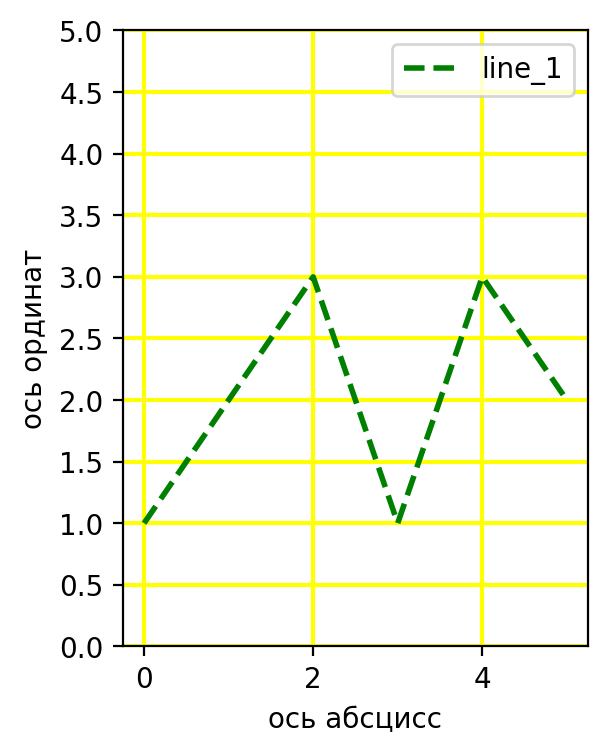

In [4]:
x = [1,2,3,1,3,2]
x = np.array([1,2,3,1,3,2])
x = pd.Series(np.array([1,2,3,1,3,2]))

plt.figure(figsize=(3, 4)) # можно указать явно ширину и высоту графика (строчка не обязательна)
plt.plot(x, linewidth=2, color='green', marker="", linestyle='dashed', label='line_1')
plt.legend() # показывать легенду
plt.grid(color='yellow', linestyle='-', linewidth=1.5) # включить отрисовку сетки c определенными параметрами
plt.yticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]) # можно явно указать, как подписывать ось
plt.xticks()
plt.xlabel('ось абсцисс')
plt.ylabel('ось ординат')

2) Другой пример - scatter (где точки не соединяются прямыми линиями), с указанием точек (x1,y1),(x2,y2),(x3,y3)...

Text(0, 0.5, 'ось ординат')

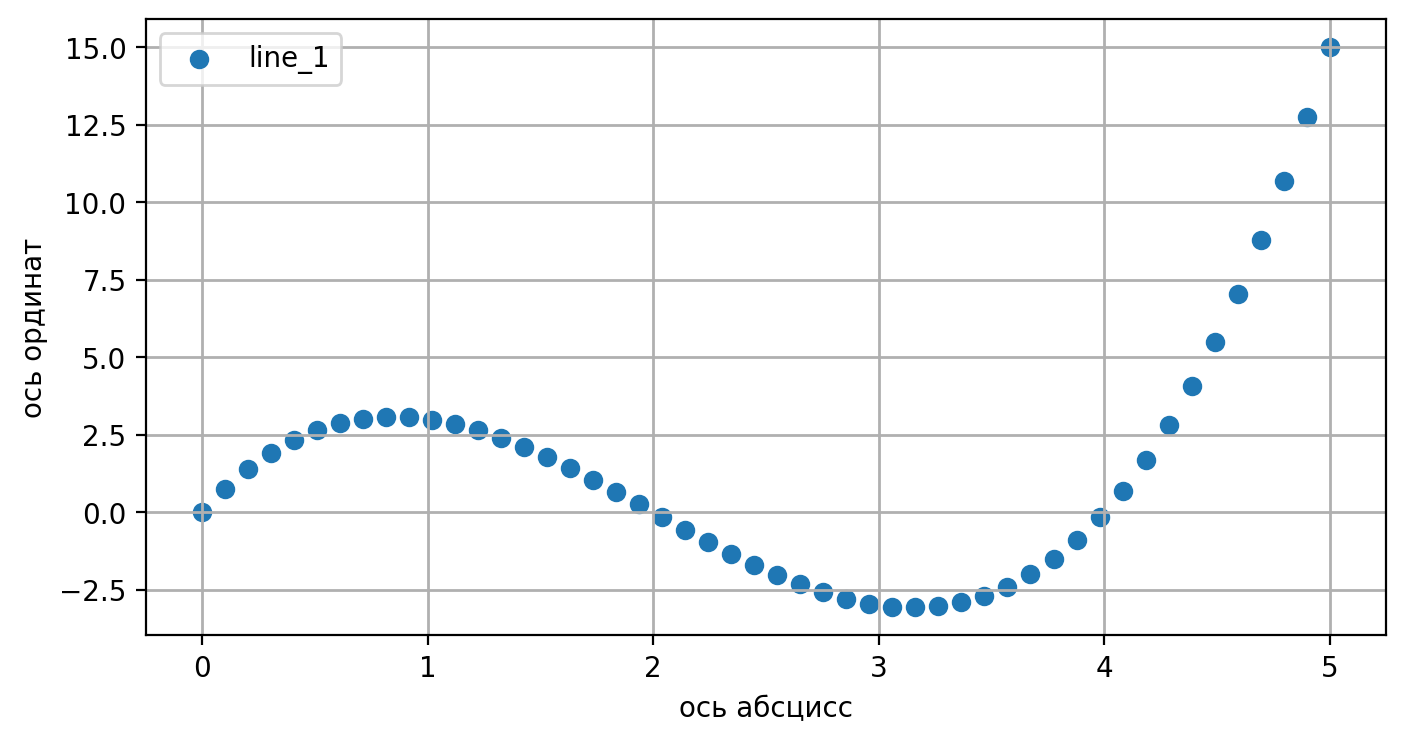

In [5]:
x = np.linspace(0, 5, 50) # создаем массив из 100 чисел float от 0 до 5 с равномернов шагом
y = x*(x - 2)*(x - 4)

plt.figure(figsize=(8,4)) # можно указать явно ширину и высоту графика (строчка не обязательна)
plt.scatter(x, y, label='line_1')
plt.legend() # показывать легенду
plt.grid(linewidth=1) # включить отрисовку сетки c определенными параметрами
plt.yticks()
plt.xticks()
plt.xlabel('ось абсцисс')
plt.ylabel('ось ординат')

2) Гистограмма - график, показывающий распределение какой-либо величины, встречающуюся в данном объеме значений. По другому, график показыват сколько раз встречается из выборки каждое значение в ней. Построим гистограммы с помощью разных библиотек.

Один из главных параметров bins  - обратная величина к ширине столбцов на графике

In [6]:
df.wage

0        5.73
1        4.28
2        7.96
3       11.57
4       11.42
        ...  
1255     1.61
1256     1.68
1257     3.29
1258     2.31
1259     1.92
Name: wage, Length: 1260, dtype: float64

In [7]:
#df['wage'].hist(figsize=(6, 4), bins=10).set_xlim((0, max(df.wage)))
df.groupby("wage")["wage"].count()

wage
1.02     1
1.05     1
1.09     1
1.16     2
1.17     1
        ..
31.09    1
32.79    1
38.86    1
41.67    1
77.72    1
Name: wage, Length: 520, dtype: int64

(0.0, 40.0)

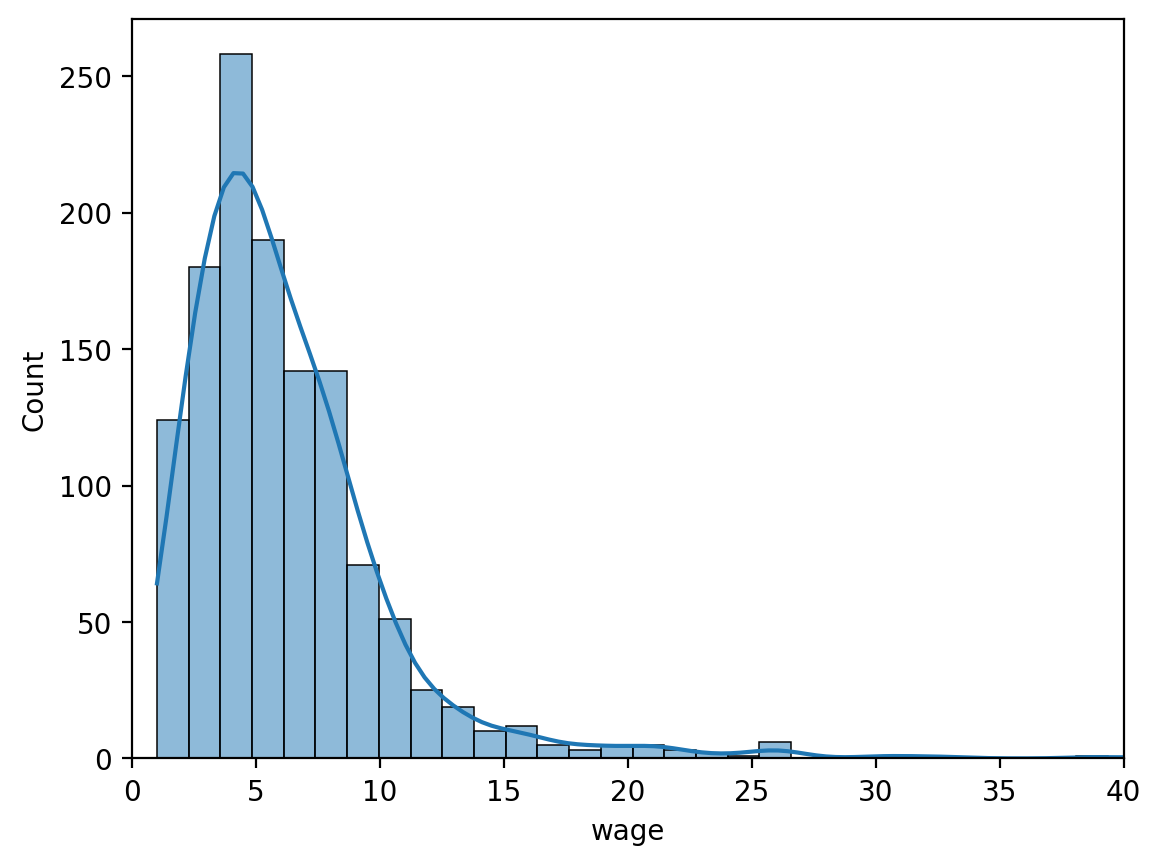

In [8]:
sns.histplot(df['wage'], bins=60, kde = 1).set_xlim((0, 40))

Можно сразу построить несколько гистограмм, относящихся к разным столбцам данных:

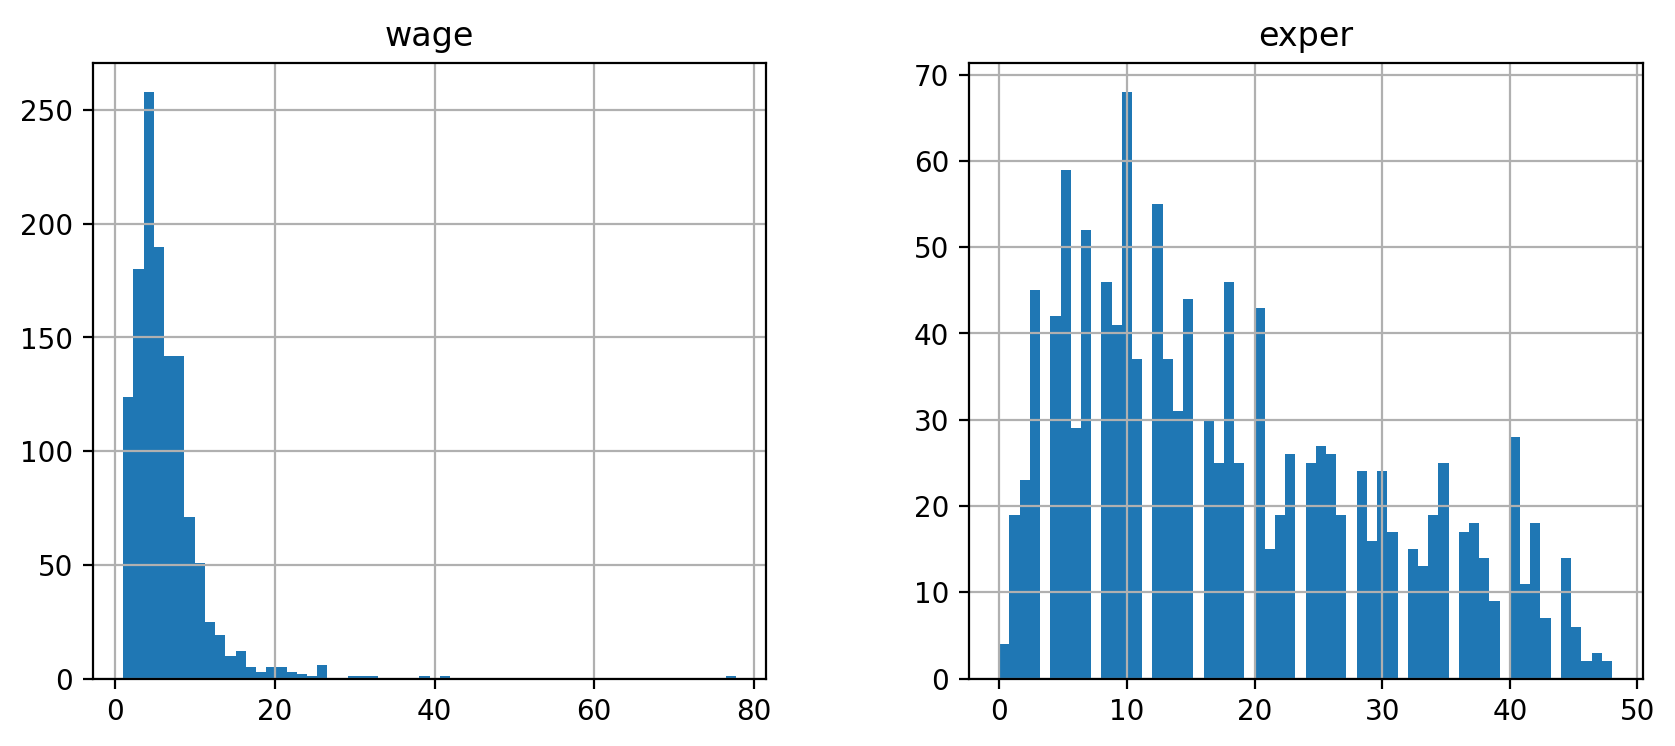

In [9]:
features = ['wage', 'exper']
df[features].hist(figsize=(10, 4), bins=60);

3) CountPlot - столбчатая диаграмма, чаще всего используется для категориальных признаков в данных. Показывает, сколько трочек в df имеют каждое из выбранного значения категориального признака.

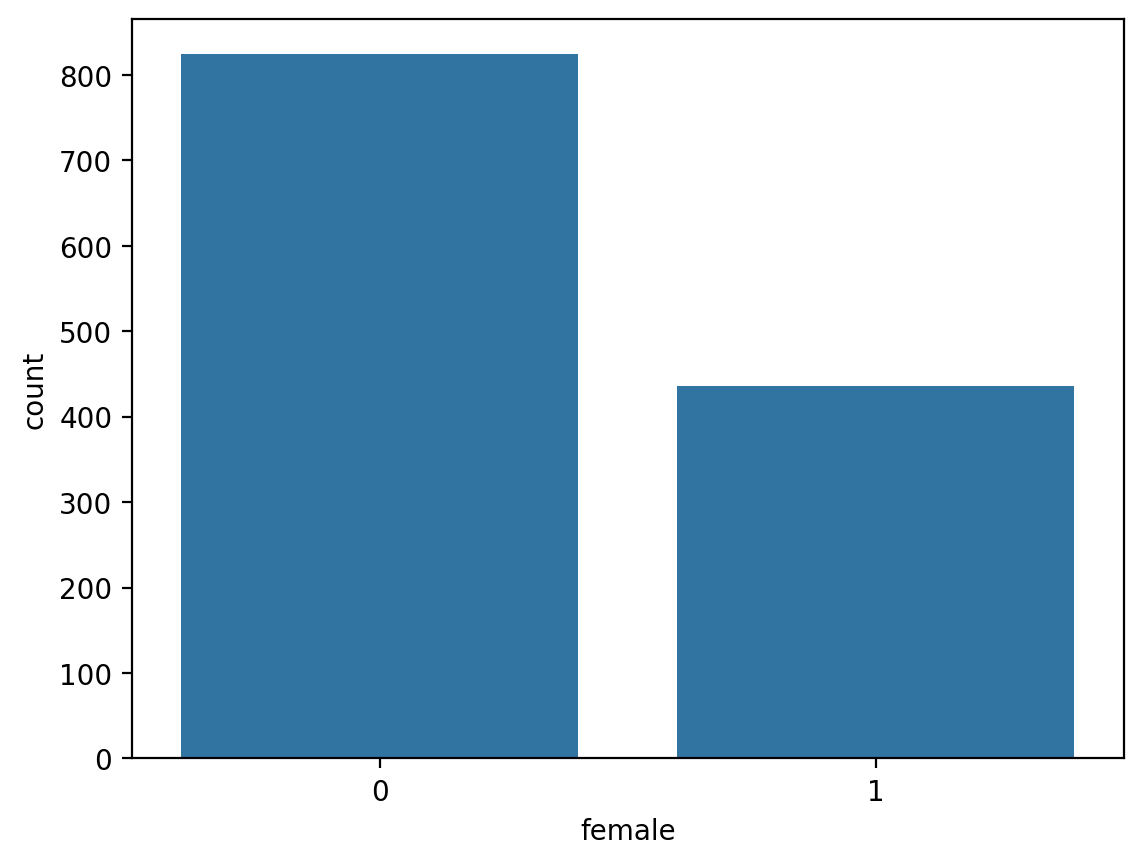

In [10]:
sns.countplot(x='female', data=df);

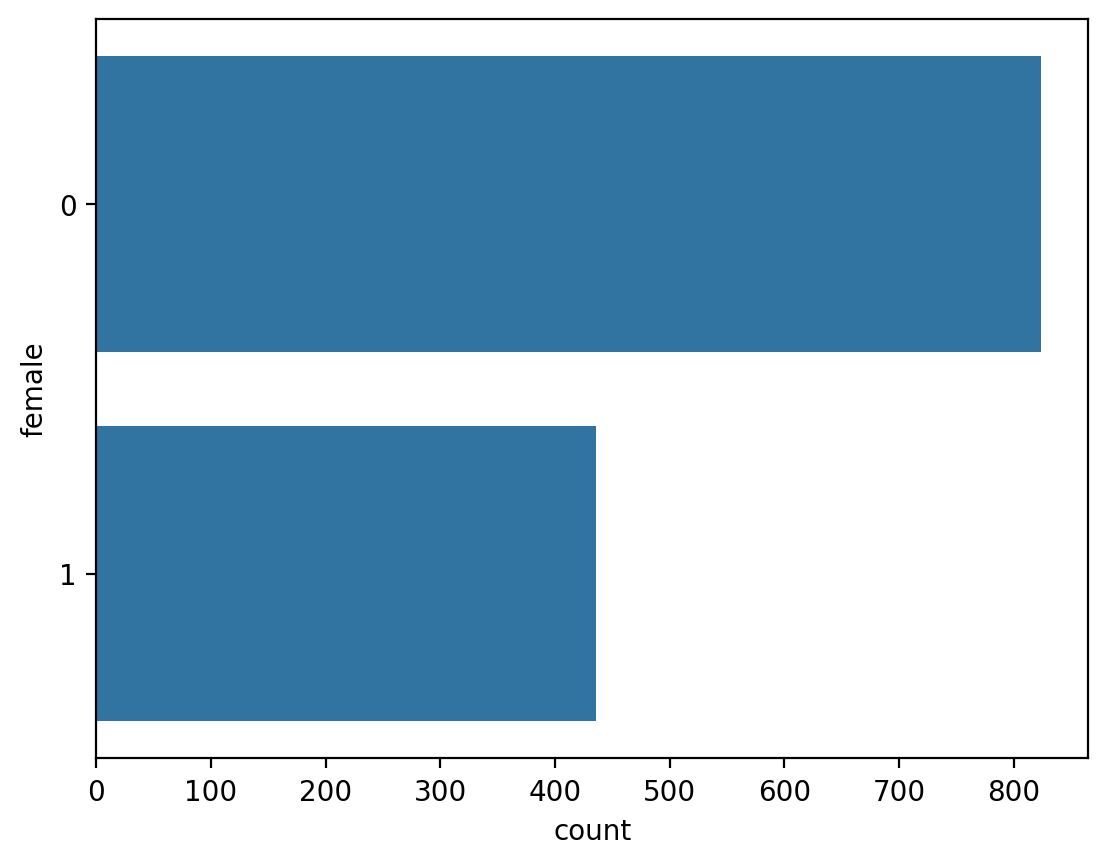

In [11]:
sns.countplot(y='female', data=df);

Приведем пример для столбца look относительно параметра female в DataFrame df

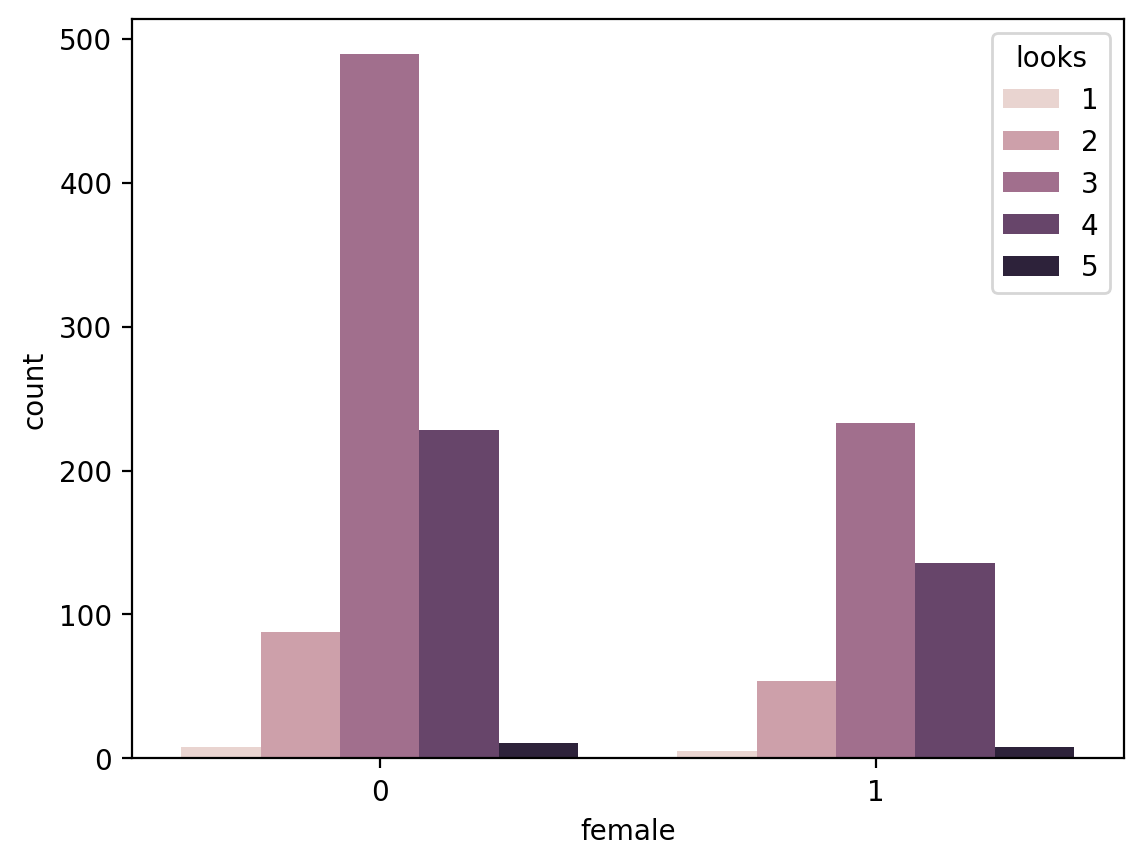

In [12]:
sns.countplot(x='female', hue='looks', data=df);

На следующем примере покажем, как нарисовать несколько графиков на одной картинке:
axes - части графика. axes[0] - левая часть, а axes[1] - правая.
Аналогично можно создать сетку 2х2 для 4х графиков (но для 4х графиков нужно указывать уже 2 координаты, например, ax=axis[1][1]).

<Axes: xlabel='looks', ylabel='count'>

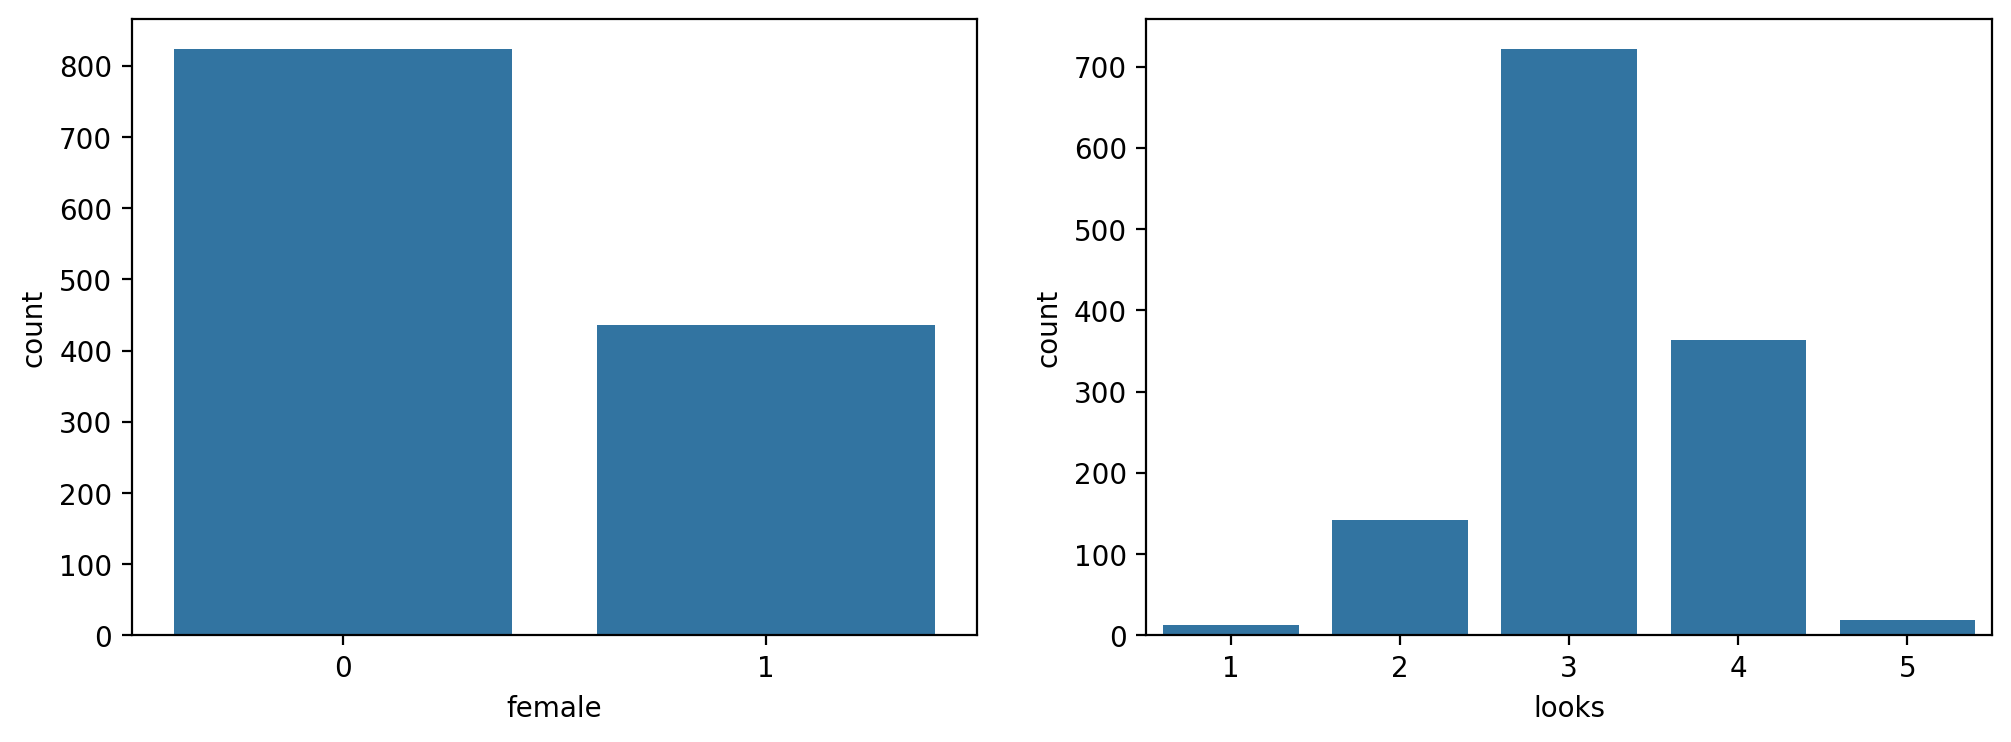

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='female', data=df, ax=axes[0])
sns.countplot(x='looks', data=df, ax=axes[1])

3) Круговая диаграмма отлично показывает соотношение частей:

In [14]:
df.groupby('female')['wage'].count()

female
0    824
1    436
Name: wage, dtype: int64

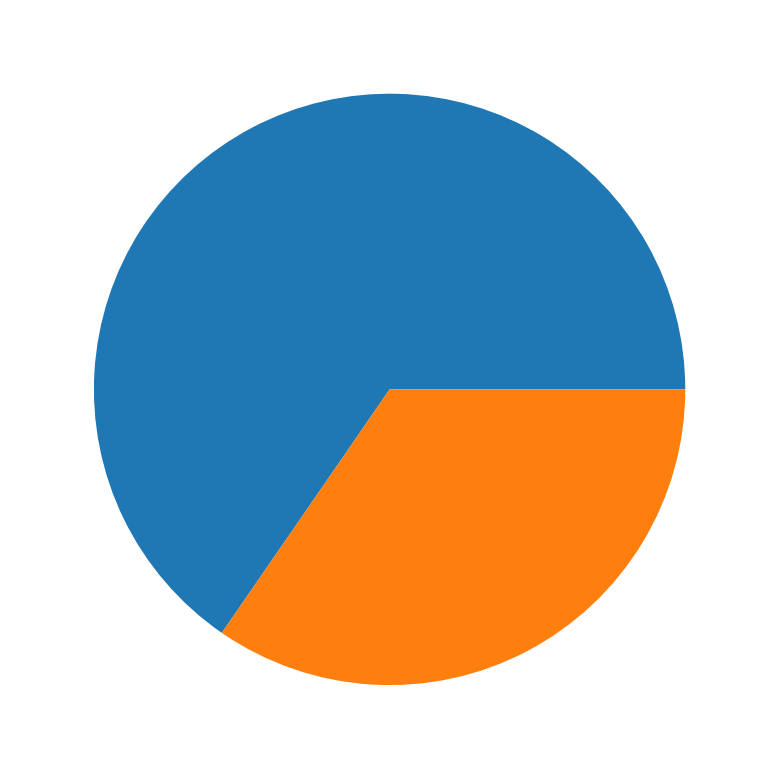

In [15]:
plt.pie(df.groupby('female')['wage'].count()); # круговая диаграмми (pie)

5) Ящик с усами, или boxplot
Box plot состоит из коробки (поэтому он и называется box plot), усиков и точек. Коробка показывает интерквартильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) перцентили.

Черта внутри коробки обозначает медиану распределения.

Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток (Q1 - 1.5*IQR, Q3 + 1.5*IQR), где IQR = Q3 - Q1 — интерквартильный размах.

Точками на графике обозначаются выбросы (outliers) — те значения, которые не вписываются в промежуток значений, заданный усами графика.

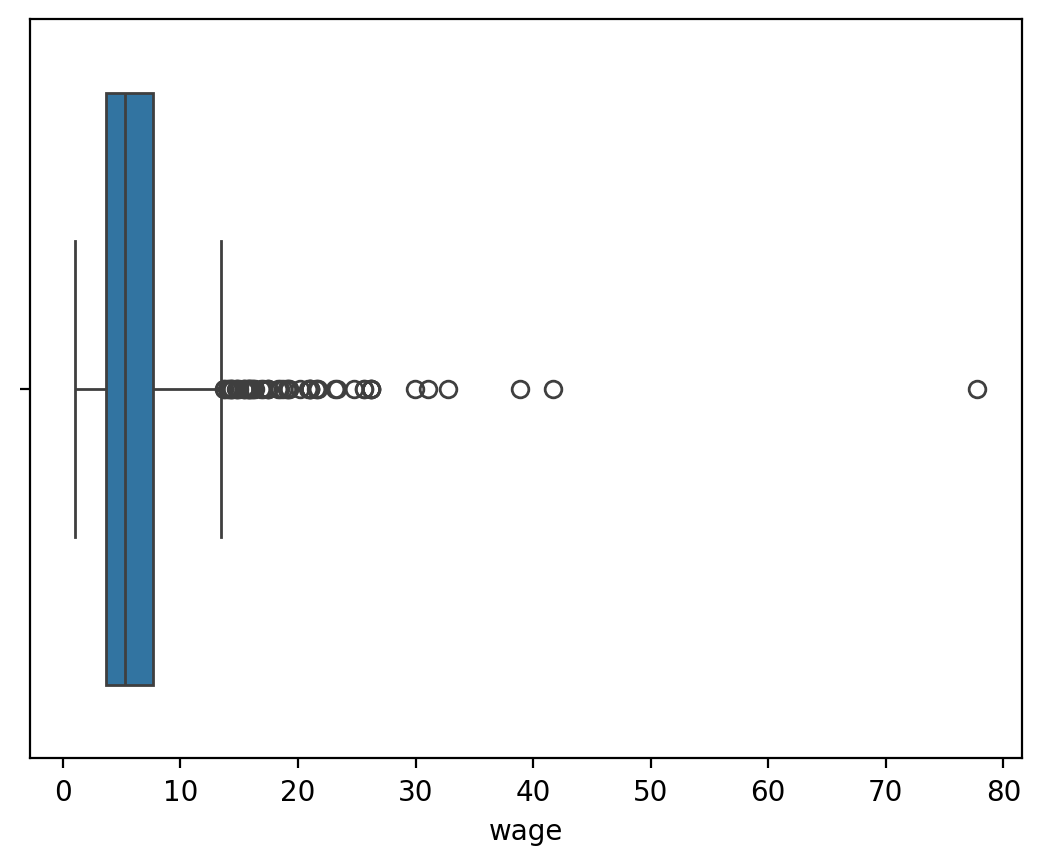

In [16]:
sns.boxplot(x='wage', data=df);

<Axes: ylabel='wage'>

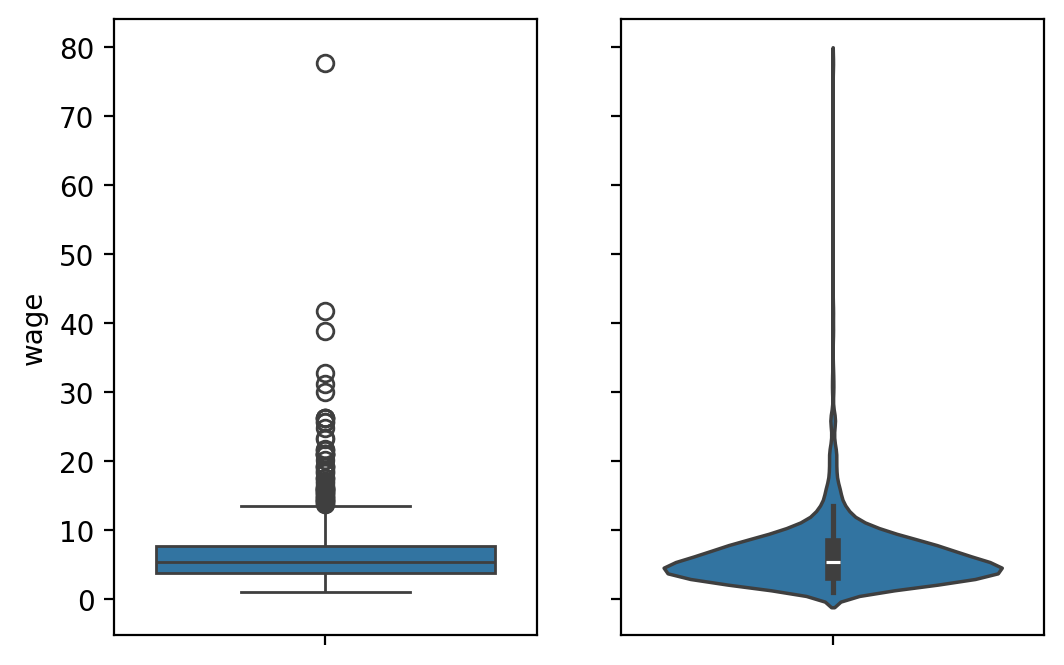

In [17]:
_, axes = plt.subplots(1, 2, sharey=1, figsize=(6, 4))
sns.boxplot(data=df['wage'], ax=axes[0])
sns.violinplot(data=df['wage'], ax=axes[1])

Для большего понимания посмотреть на картинку из Wikipedia:

6) joint plot: Для того, чтобы подробнее посмотреть на взаимосвязь двух численных признаков, есть еще и joint plot — это гибрид scatter plot и histogram. Посмотрим на то, как связаны между собой wage и exper.

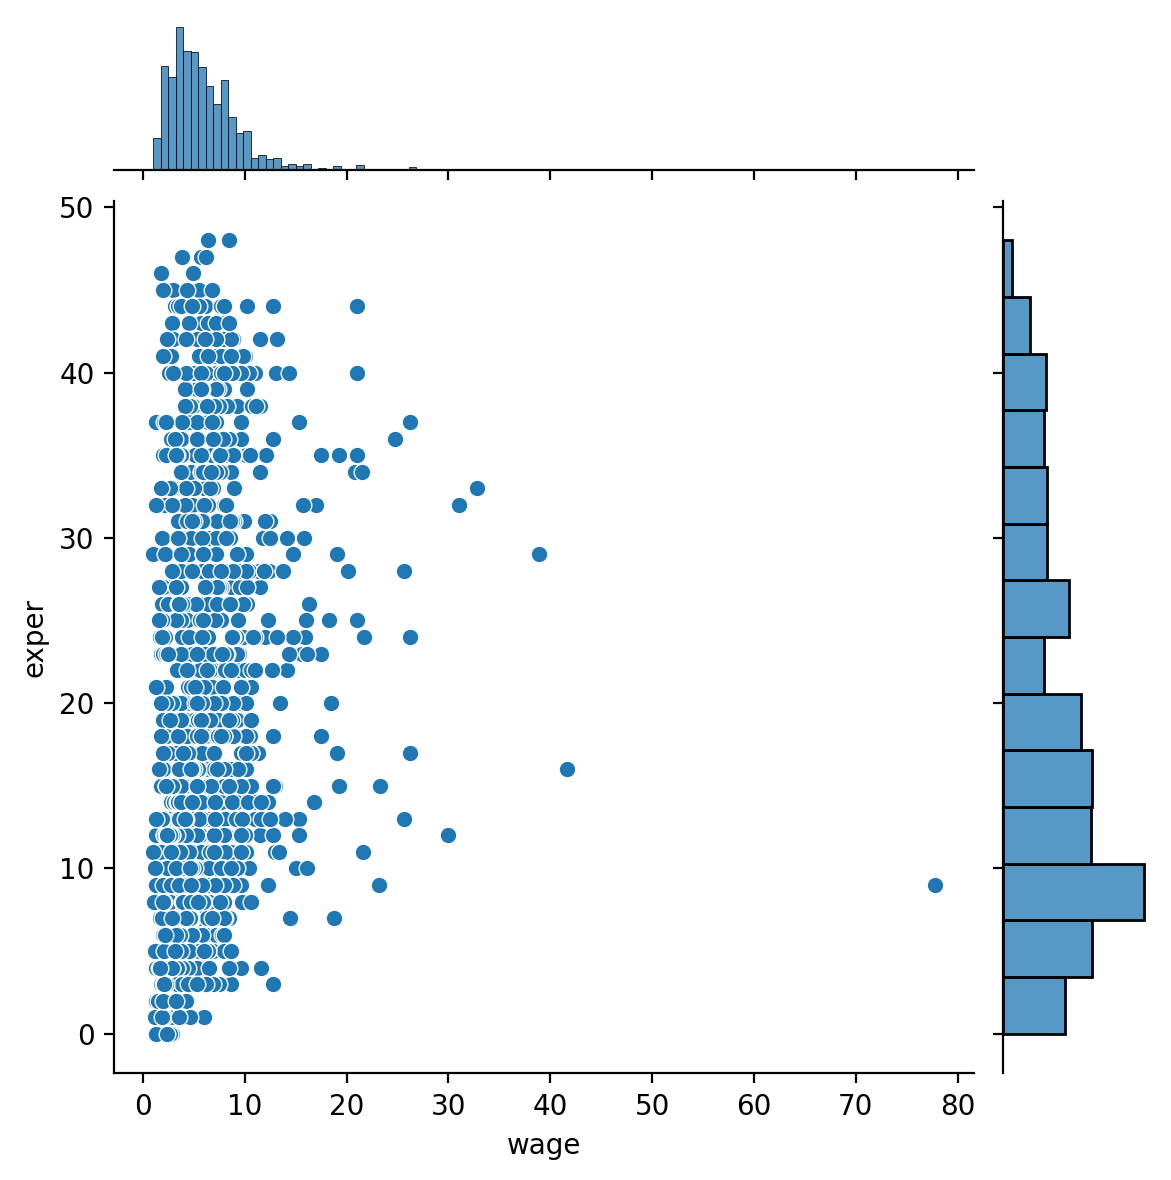

In [18]:
sns.jointplot(x='wage', y='exper', data=df, kind='scatter');

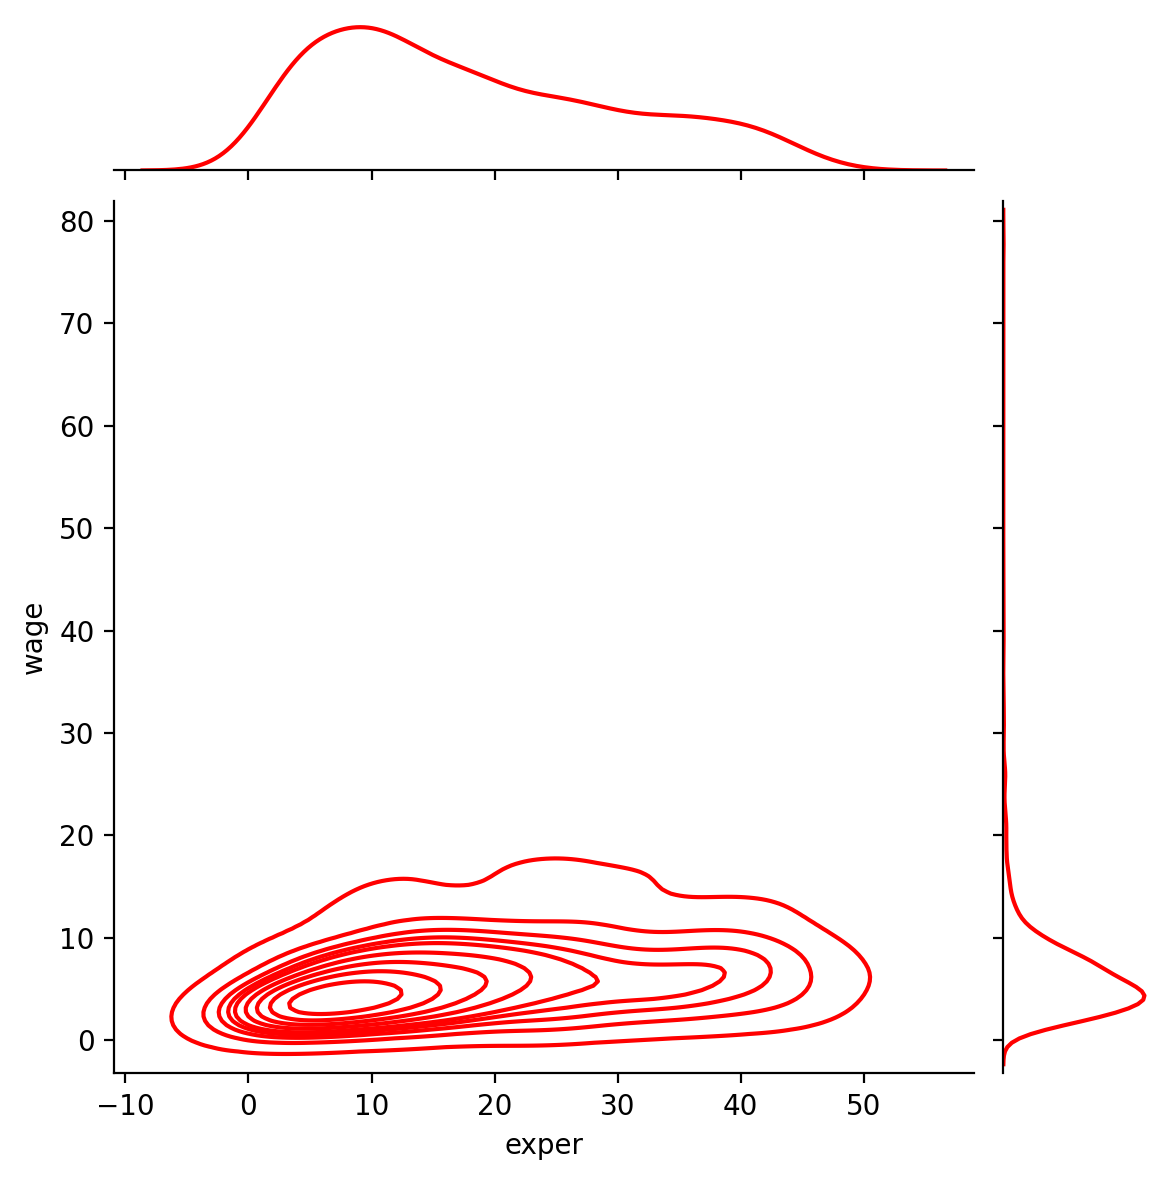

In [19]:
sns.jointplot(x = 'exper', y = 'wage', data=df, kind="kde", color="r");

После всего вышесказанного, нужно отметить, что можно делать некоторые операции над DataFrame, и уже к ним применять метод .plot(...)

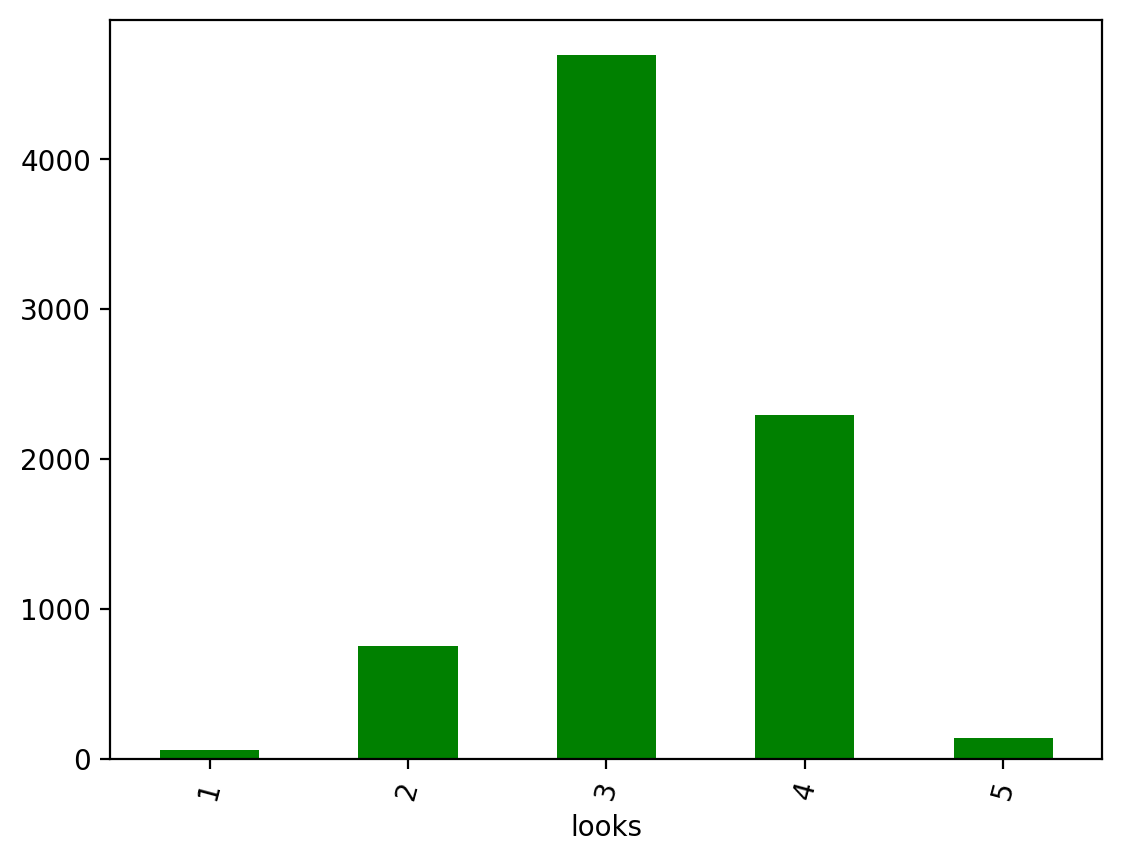

In [20]:
df.groupby('looks')["wage"].sum().plot(kind='bar', rot=75, color='green');

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

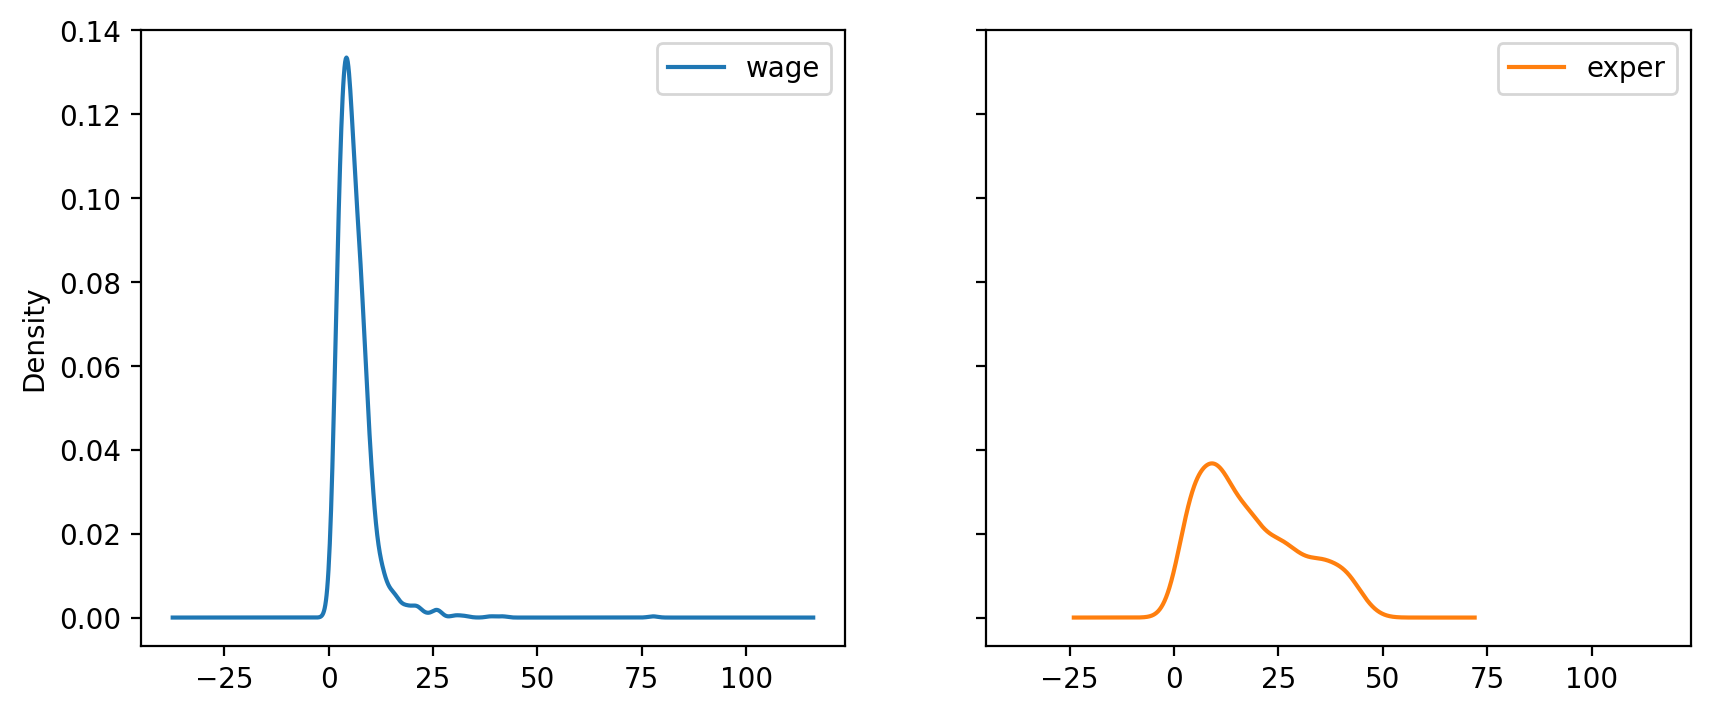

In [21]:
df[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharey=1, figsize=(10, 4))

## 3D графики

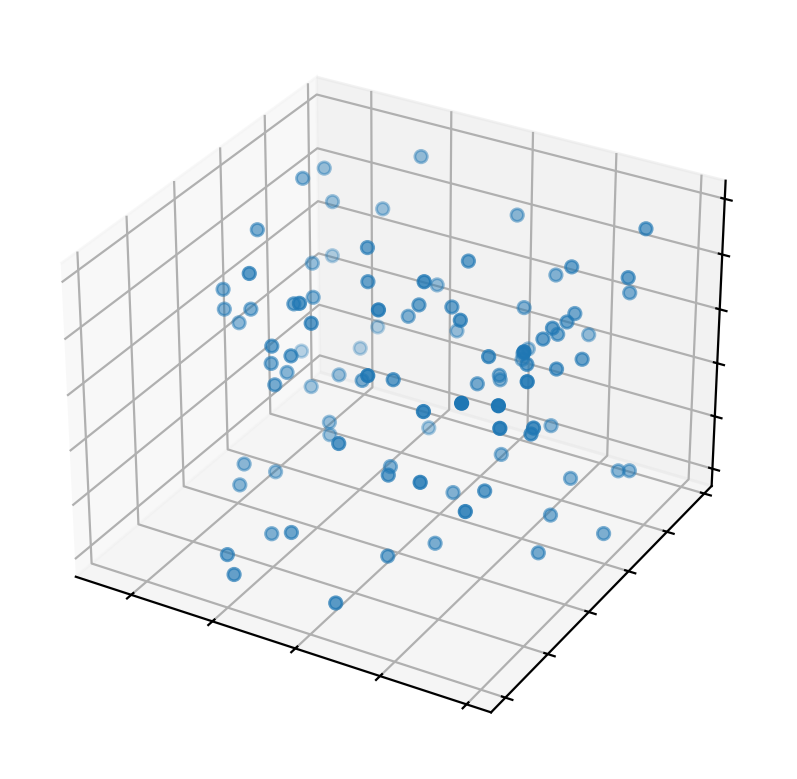

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Make data
np.random.seed(19680801)
n = 100
rng = np.random.default_rng()
xs = rng.uniform(23, 32, n)
ys = rng.uniform(0, 100, n)
zs = rng.uniform(-50, -25, n)

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(xs, ys, zs)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

## Создание анимации

Покажемсоздание анимации на примере построения разделябщей прямой между данными: https://hsto.org/webt/h7/vn/dt/h7vndtkzlinfkyoqzpcmjxecubu.gif из статьи про SVM https://habr.com/ru/company/ods/blog/484148/

MovieWriter imagemagick unavailable; using Pillow instead.


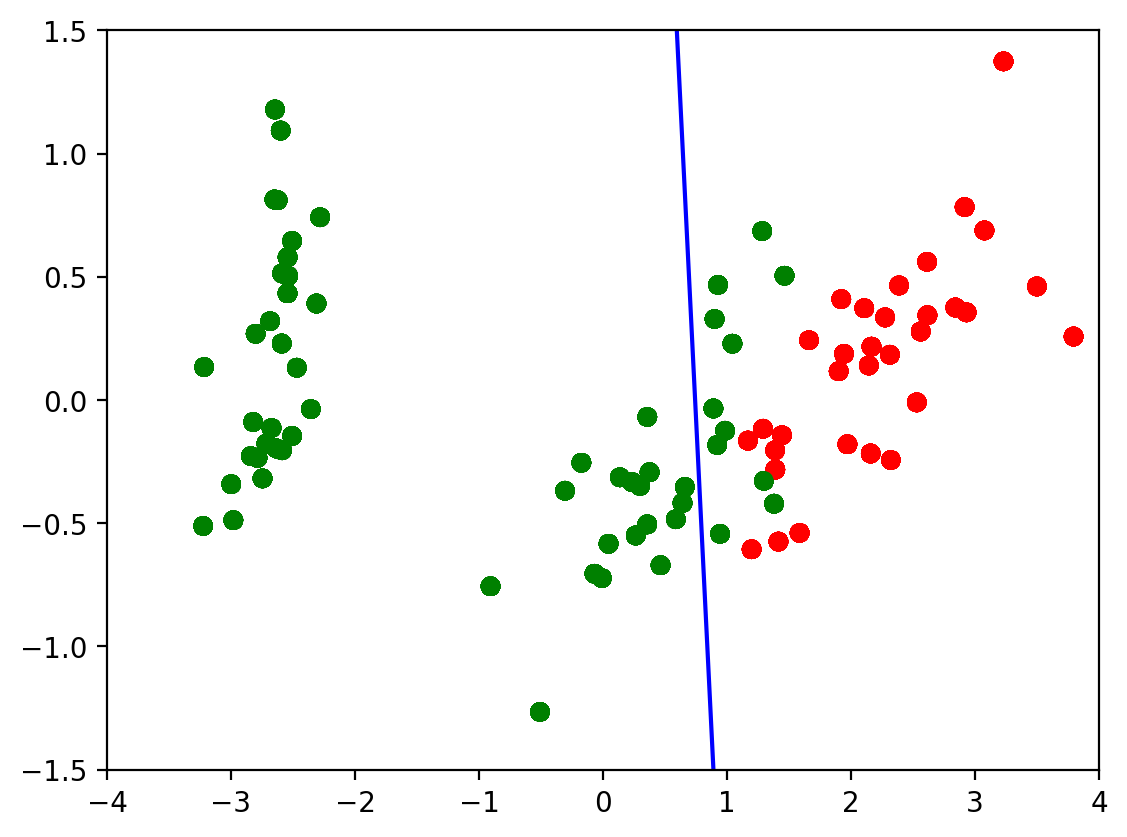

In [23]:
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
import matplotlib.lines as mlines

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

def newline(p1, p2, color=None): # функция отрисовки линии
    #function kredits to: https://fooobar.com/questions/626491/how-to-draw-a-line-with-matplotlib
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], color=color)
    ax.add_line(l)
    return l


def one_image(w, X, Y): # фунцкия отрисовки одного кадра
    axes = plt.gca()
    axes.set_xlim([-4,4])
    axes.set_ylim([-1.5,1.5])
    d1 = {-1:'green', 1:'red'}
    im = plt.scatter(X[:,0], X[:,1], c=[d1[y] for y in Y])
    im = newline([0,-w[2]/w[1]],[-w[2]/w[0],0], 'blue')
    return im


# блок подготовки данных
iris = load_iris()
X = iris.data
Y = iris.target
pca = PCA(n_components=2)
X = pca.fit_transform(X)
Y = (Y == 2).astype(int)*2-1 # [0,1,2] --> [False,False,True] --> [0,1,1] --> [0,0,2] --> [-1,1,1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=2020)

history_w = np.array([[ 1.40100620e-02,  3.82414425e-02,  9.29992169e-03],
       [ 9.34759319e-02,  1.38405275e-02, -2.07000784e-02],
       [ 1.77059209e-01,  2.08938874e-02, -5.07000782e-02],
       [ 2.57582976e-01,  1.13119698e-02, -8.07000777e-02],
       [ 2.57845336e-01,  3.30044268e-02, -1.10700077e-01],
       [ 2.48875308e-01,  4.34713607e-02, -1.40700076e-01],
       [ 2.10330535e-01,  2.29165461e-02, -1.70700074e-01],
       [ 2.88030722e-01,  1.60452308e-02, -2.00700073e-01],
       [ 3.65670311e-01,  6.38421381e-04, -2.30700071e-01],
       [ 4.22698556e-01,  4.13726013e-03, -2.00700068e-01],
       [ 3.91374597e-01, -2.71359690e-03, -2.30700066e-01],
       [ 4.56157722e-01, -9.23192424e-03, -2.00700064e-01],
       [ 4.56157718e-01, -9.23192415e-03, -2.00700062e-01],
       [ 4.56157713e-01, -9.23192405e-03, -2.00700060e-01],
       [ 5.15303640e-01, -1.46237611e-02, -1.70700058e-01],
       [ 5.15303635e-01, -1.46237609e-02, -1.70700056e-01],
       [ 5.15303630e-01, -1.46237608e-02, -1.70700055e-01],
       [ 5.15303625e-01, -1.46237607e-02, -1.70700053e-01],
       [ 5.15303619e-01, -1.46237605e-02, -1.70700051e-01],
       [ 5.51273647e-01, -3.28065062e-02, -1.40700049e-01],
       [ 5.51273642e-01, -3.28065059e-02, -1.40700048e-01],
       [ 5.51273636e-01, -3.28065055e-02, -1.40700047e-01],
       [ 5.66508857e-01,  5.17263051e-03, -1.70700045e-01],
       [ 5.66508852e-01,  5.17263046e-03, -1.70700044e-01],
       [ 5.66508846e-01,  5.17263040e-03, -1.70700042e-01],
       [ 5.66508840e-01,  5.17263035e-03, -1.70700040e-01],
       [ 5.48868641e-01,  1.97012529e-02, -2.00700038e-01],
       [ 5.48868636e-01,  1.97012527e-02, -2.00700036e-01],
       [ 5.48868630e-01,  1.97012525e-02, -2.00700034e-01],
       [ 5.54086386e-01,  2.73468786e-02, -2.30700032e-01],
       [ 5.96543457e-01,  1.00993879e-02, -2.00700030e-01],
       [ 5.96543451e-01,  1.00993878e-02, -2.00700028e-01],
       [ 5.96543445e-01,  1.00993877e-02, -2.00700026e-01],
       [ 6.38206423e-01,  3.96740775e-03, -1.70700024e-01],
       [ 6.38206417e-01,  3.96740771e-03, -1.70700022e-01],
       [ 6.11201179e-01, -5.88772655e-03, -2.00700021e-01],
       [ 6.52906839e-01, -1.43675546e-02, -1.70700019e-01],
       [ 6.52906832e-01, -1.43675545e-02, -1.70700017e-01],
       [ 6.52906826e-01, -1.43675543e-02, -1.70700015e-01],
       [ 6.42197374e-01,  7.79748602e-04, -2.00700014e-01],
       [ 6.03251852e-01,  1.06133678e-02, -2.30700012e-01],
       [ 6.03251846e-01,  1.06133677e-02, -2.30700009e-01],
       [ 6.05295634e-01,  3.17685316e-02, -2.60700007e-01],
       [ 6.05295628e-01,  3.17685313e-02, -2.60700004e-01],
       [ 6.05295622e-01,  3.17685310e-02, -2.60700002e-01],
       [ 5.85487103e-01,  4.23576206e-02, -2.90699999e-01],
       [ 5.85487097e-01,  4.23576202e-02, -2.90699996e-01],
       [ 5.57651268e-01,  2.83422349e-02, -3.20699993e-01],
       [ 5.53558401e-01,  3.77632078e-02, -3.50699990e-01],
       [ 5.12157603e-01,  5.03918360e-02, -3.80699987e-01]])


fig = plt.figure()
ims = [] # набиваем в этот список кадры с помощью цикла
for i in range(50):
    im = one_image(history_w[i], X_train, Y_train)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=20, blit=True, # используем волшебную команду
                                repeat_delay=500)
writer = PillowWriter(fps=20) # устанавливаем фпс

ani.save("my_demo.gif", writer='imagemagick') # сохраняем

# Домашнее задание:
1) взять данные отсюда: https://github.com/Laggg/data--for--students (flight_delays.csv)

2) для каждой задачи получить ответ на вопрос через pandas и визуализировать его любым подходящим способом (у всех графиков должна быть легенда, подписаны оси):

    - доля всех задержек ко всем вылетам
    - найти зависимость количества задержек от длины пути, который предстоит пролететь самолету
    - топ 5 направлений, для которых чаще всего происходят задержки
    - в какие времена года чаще всего происходят задержки рейсов
    - найти топ 10 самых хороших перевозчиков, которые реще всего задерживают свои рейсы
    - найти топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки
    - найти необычную зависимость количества задержек от имеющихся данных

In [24]:
import pandas as pd

data = pd.read_csv('flight_delays.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         100000 non-null  object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


Text(0.5, 0, 'was delayed?')

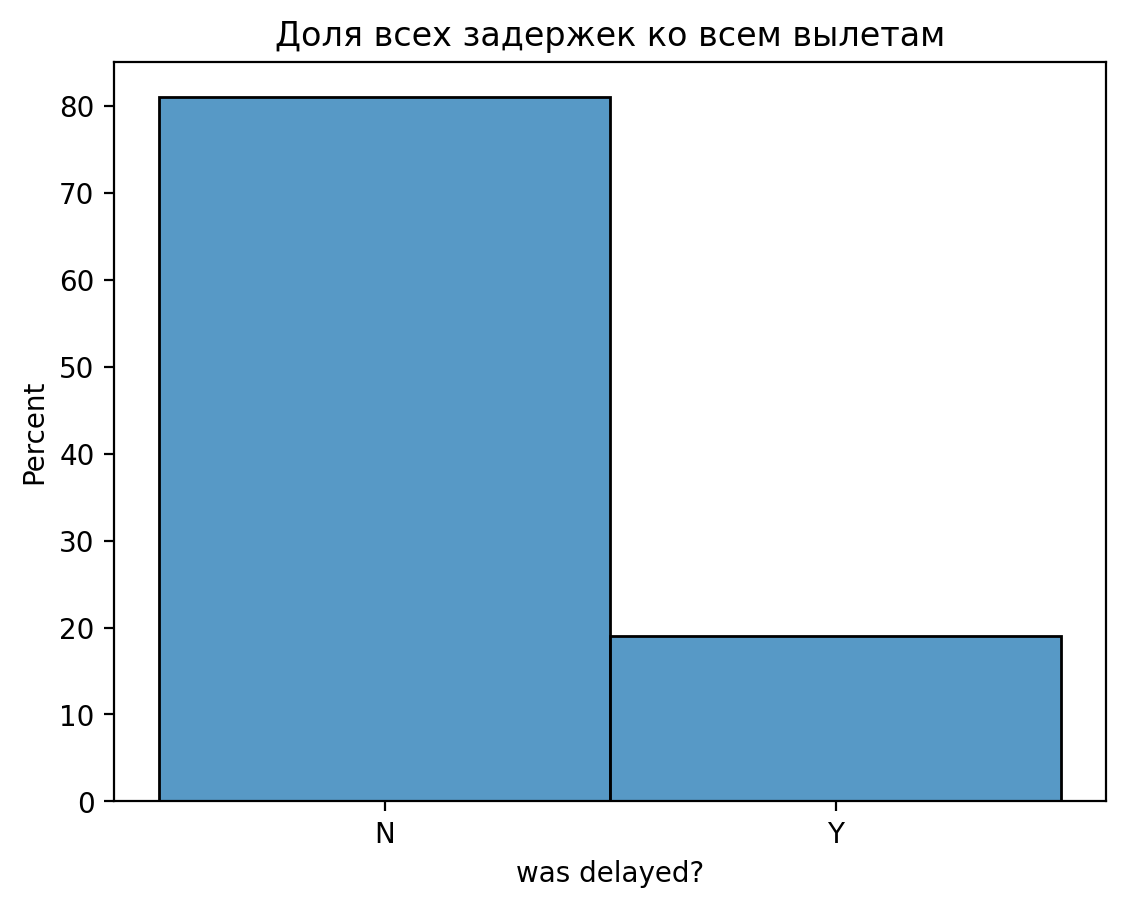

In [25]:
plt.title('Доля всех задержек ко всем вылетам')
sns.histplot(data, x='dep_delayed_15min', stat="percent")
plt.xlabel("was delayed?")

In [26]:
data.groupby("Distance")["Distance"].count().tail(5)

Distance
4243    24
4431     2
4433     8
4502    24
4962    11
Name: Distance, dtype: int64

Text(0, 0.5, 'Number of delays')

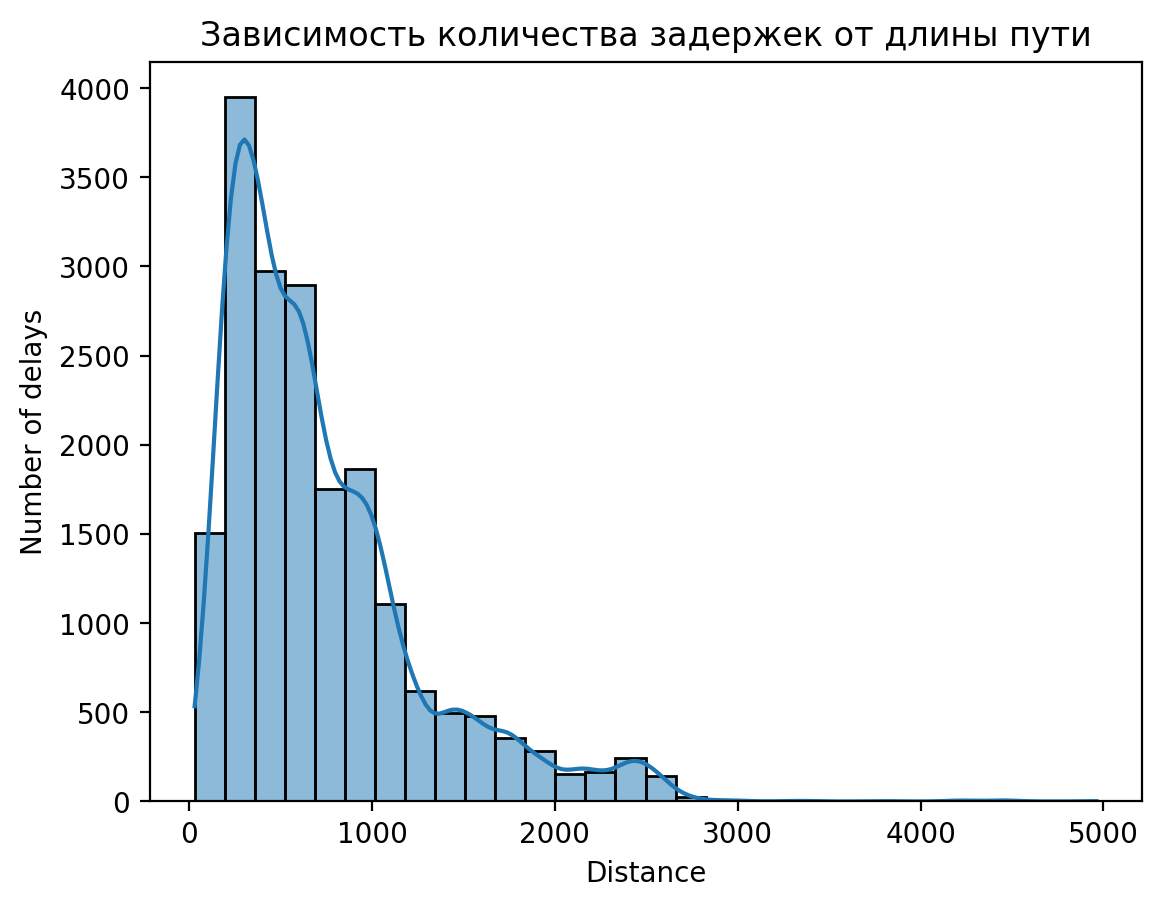

In [27]:
plt.title('Зависимость количества задержек от длины пути')
sns.histplot(data[data.dep_delayed_15min == "Y"], x="Distance", bins = 30, kde = True)
plt.ylabel("Number of delays")

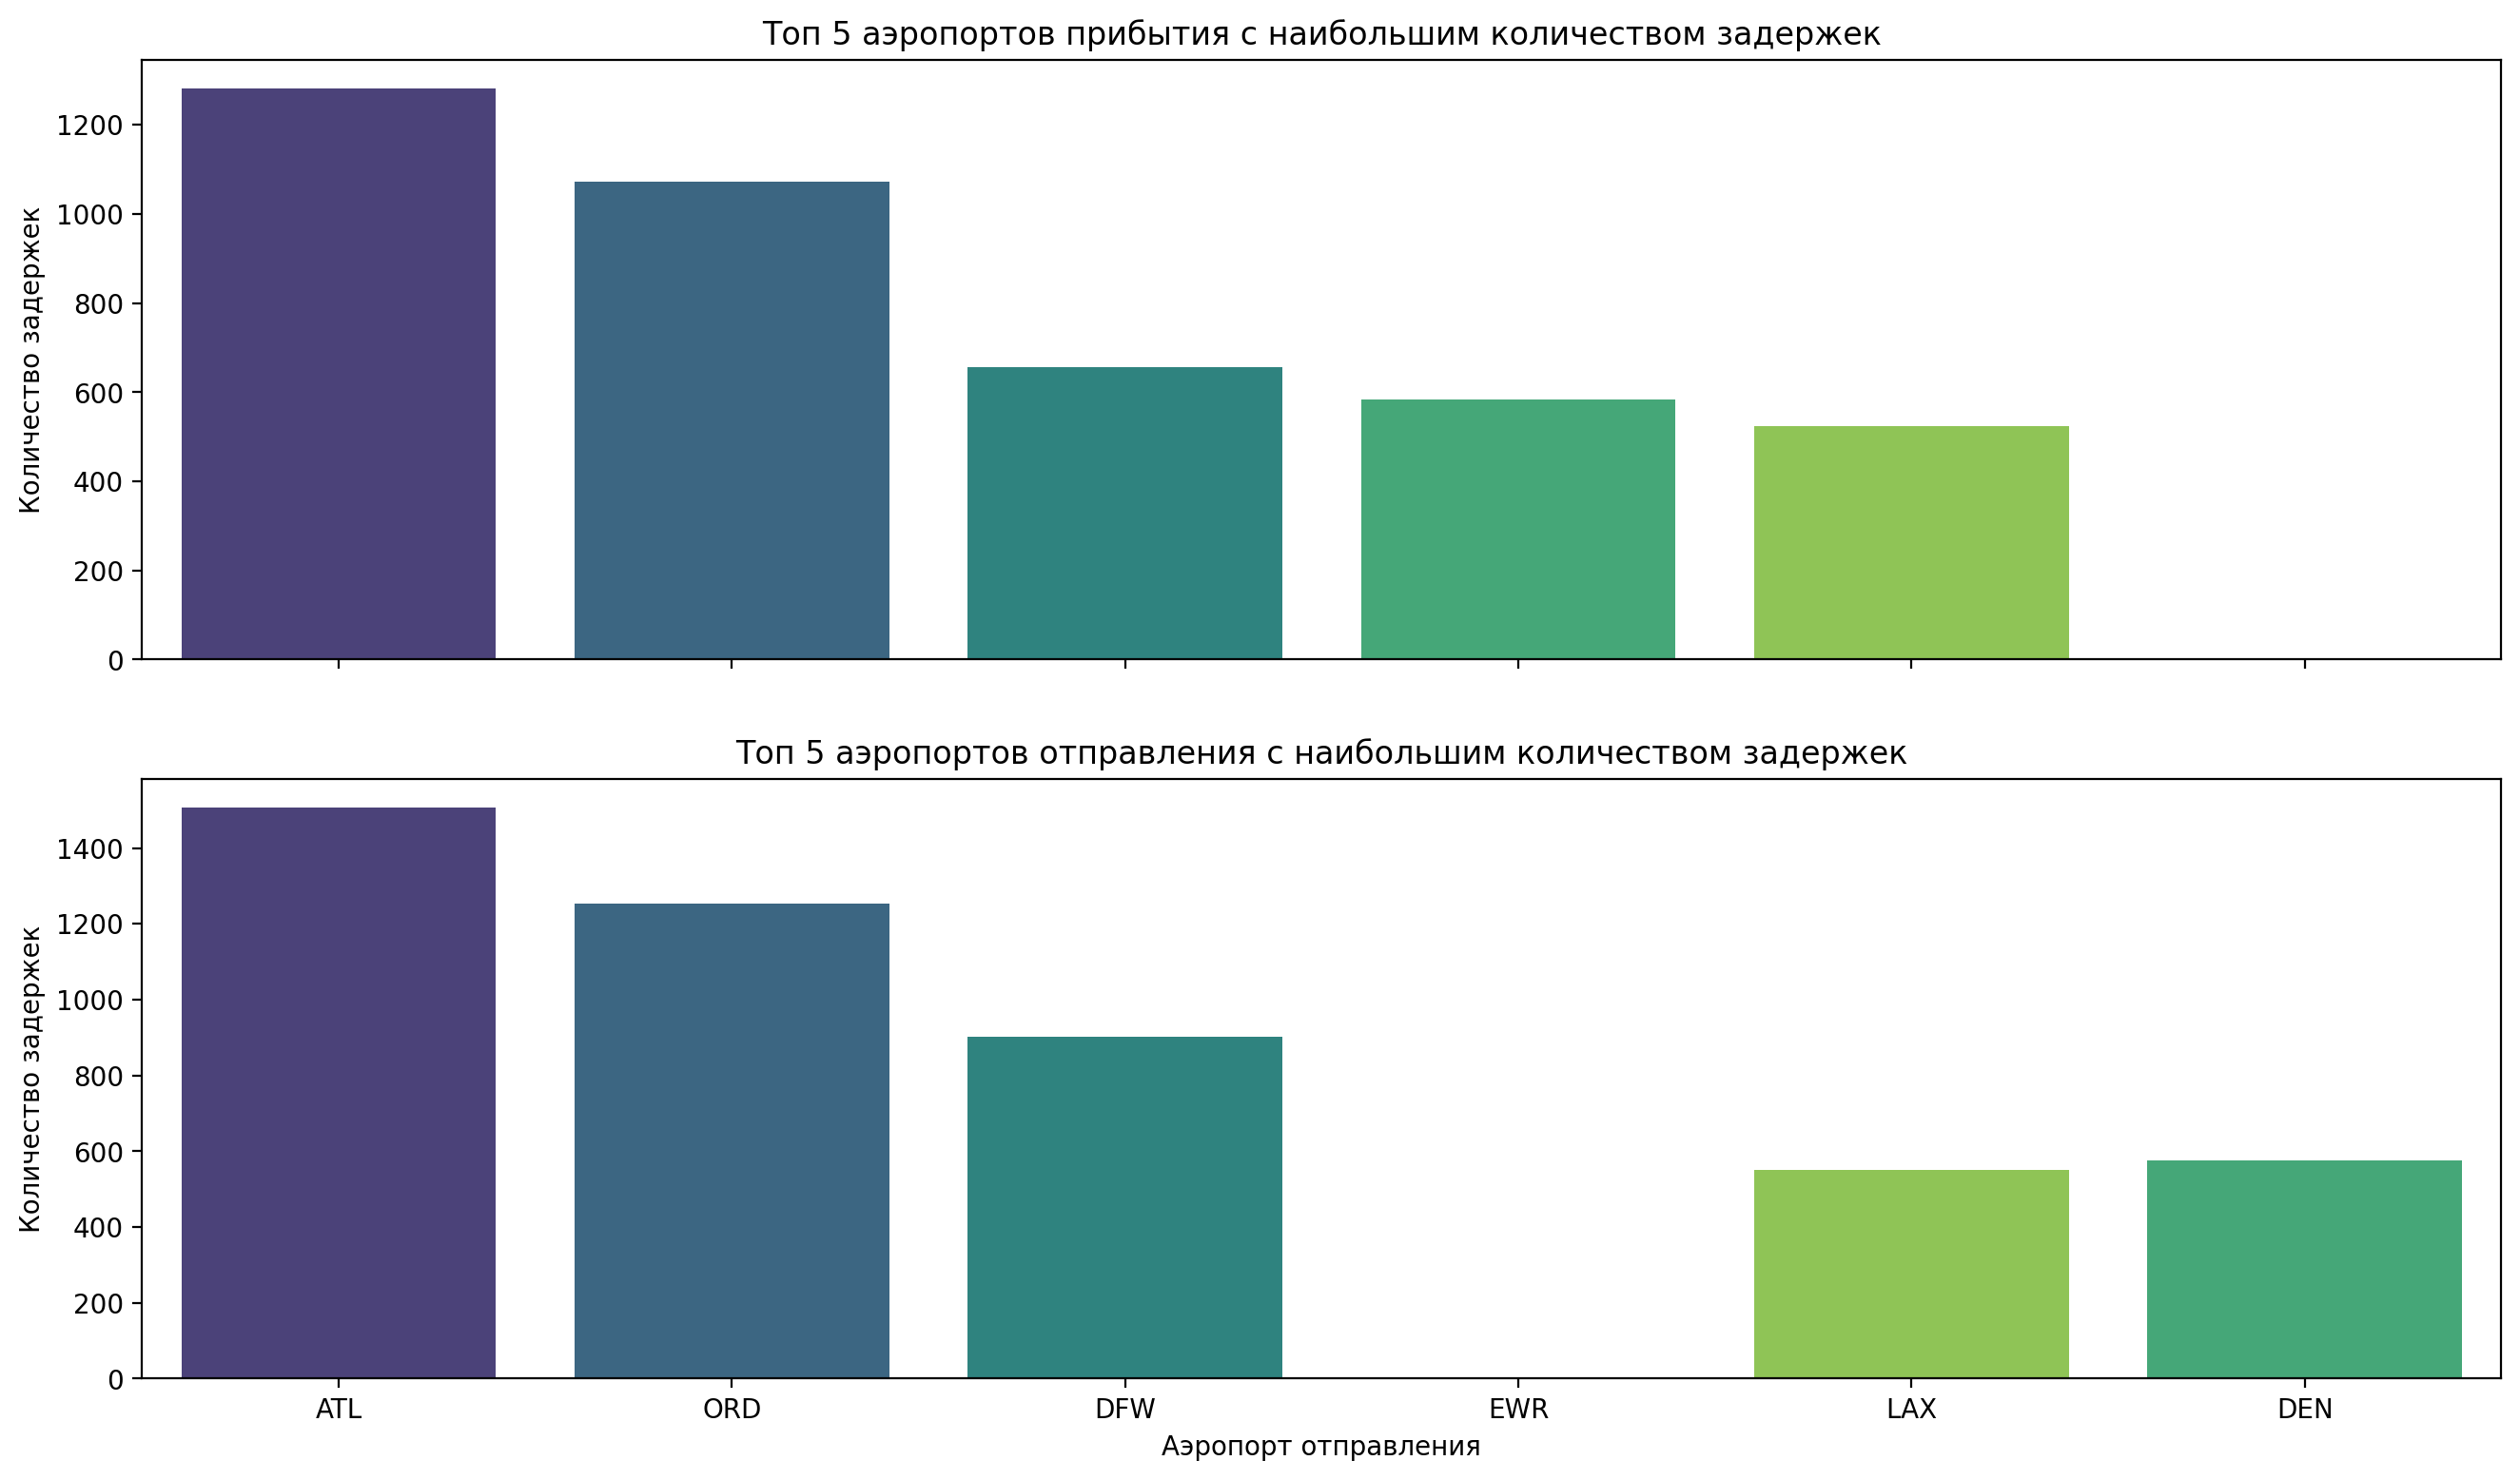

In [28]:
delayed_flights = data[data['dep_delayed_15min'] == "Y"]

top_delayed_destinations = delayed_flights.groupby('Dest')['dep_delayed_15min'].count().sort_values(ascending=False).head(5)
top_delayed_origins = delayed_flights.groupby('Origin')['dep_delayed_15min'].count().sort_values(ascending=False).head(5)

fig, axes = plt.subplots(2, 1, sharex=1, figsize=(16, 9))

sns.barplot(x=top_delayed_destinations.index, y=top_delayed_destinations.values, palette='viridis', ax=axes[0])
axes[0].set_title('Топ 5 аэропортов прибытия с наибольшим количеством задержек')
axes[0].set_ylabel('Количество задержек')

sns.barplot(x=top_delayed_origins.index, y=top_delayed_origins.values, palette='viridis', ax=axes[1])
axes[1].set_title('Топ 5 аэропортов отправления с наибольшим количеством задержек')
axes[1].set_xlabel('Аэропорт отправления')
axes[1].set_ylabel('Количество задержек')

plt.show()


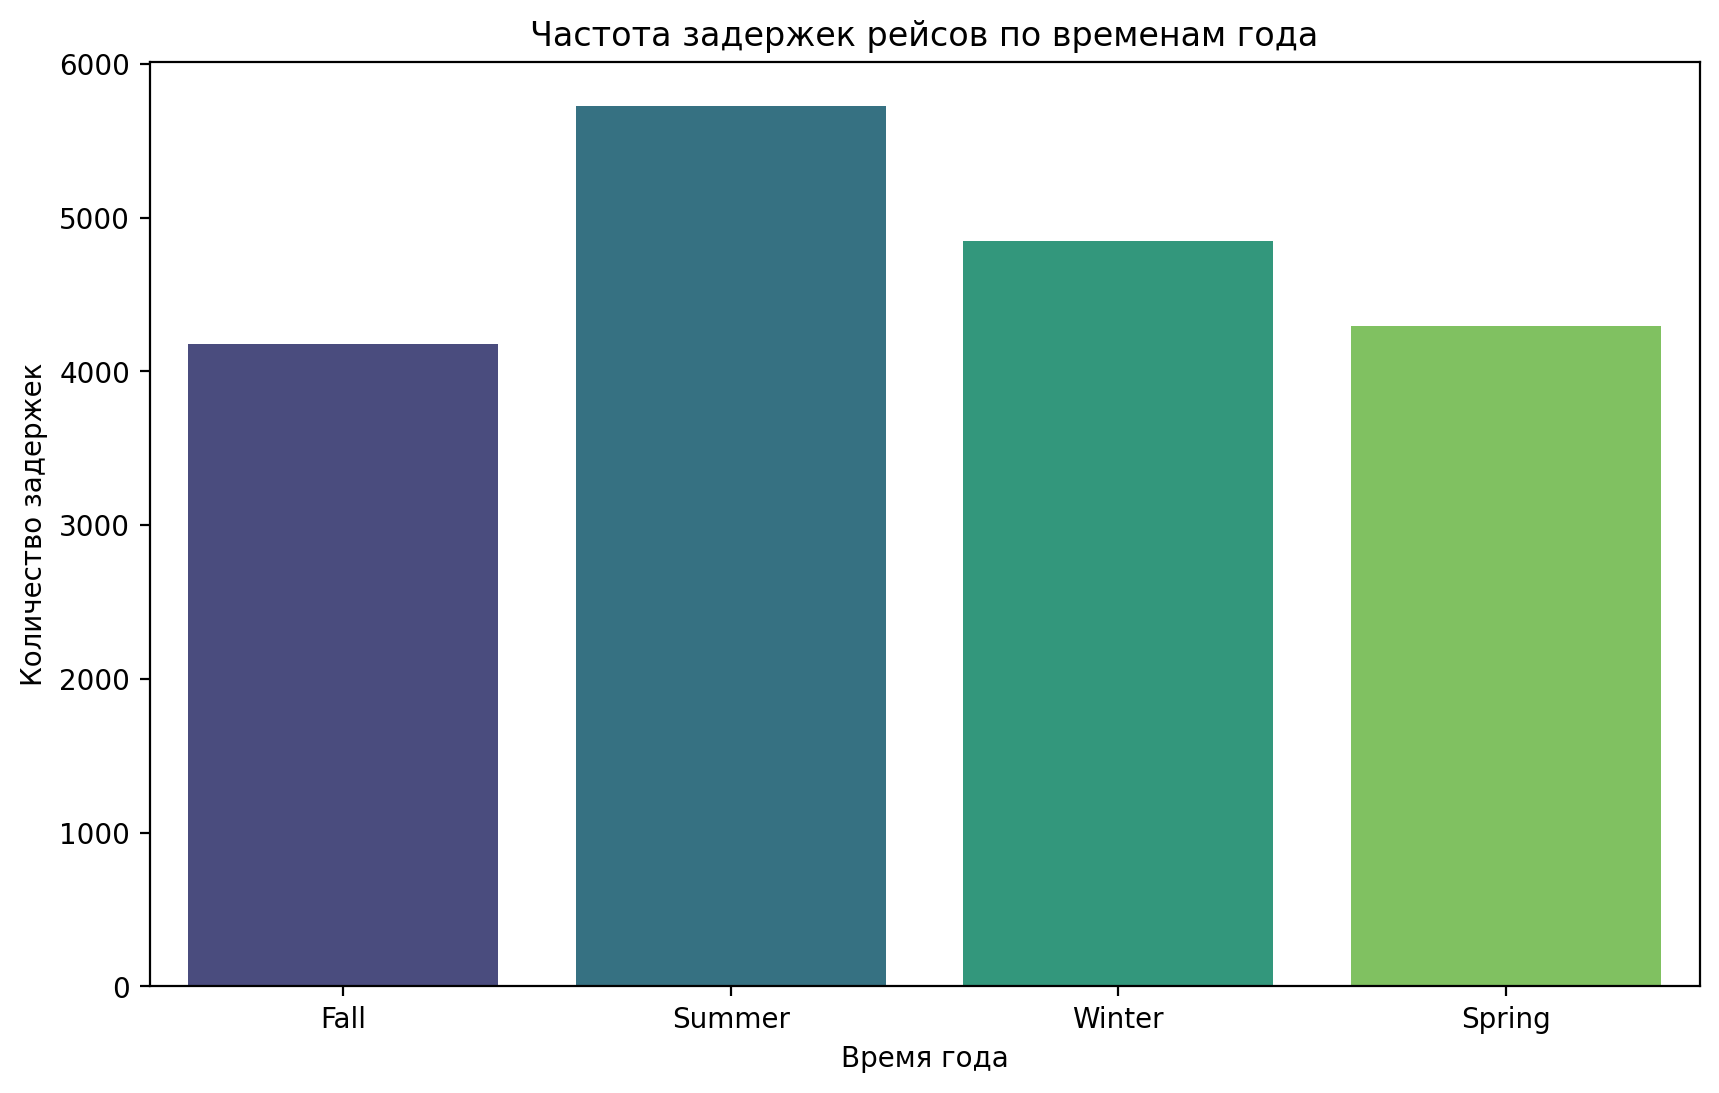

In [29]:
data = pd.read_csv('flight_delays.csv')
data['Month'] = data['Month'].apply(lambda x: int(x.split('-')[1]))

seasons_dict = {"Winter": {1, 2, 12}, "Spring": {3, 4, 5}, "Summer": {6, 7, 8}, "Fall": {9, 10, 11}}

# Создание столбца 'Season' на основе месяцев и словаря
data['Month'] = data['Month'].astype(int)
data['Season'] = data['Month'].map({month: season for season, months in seasons_dict.items() for month in months})

# Визуализация
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', data=data[data['dep_delayed_15min'] == "Y"], palette='viridis')
plt.title('Частота задержек рейсов по временам года')
plt.xlabel('Время года')
plt.ylabel('Количество задержек')

plt.show()

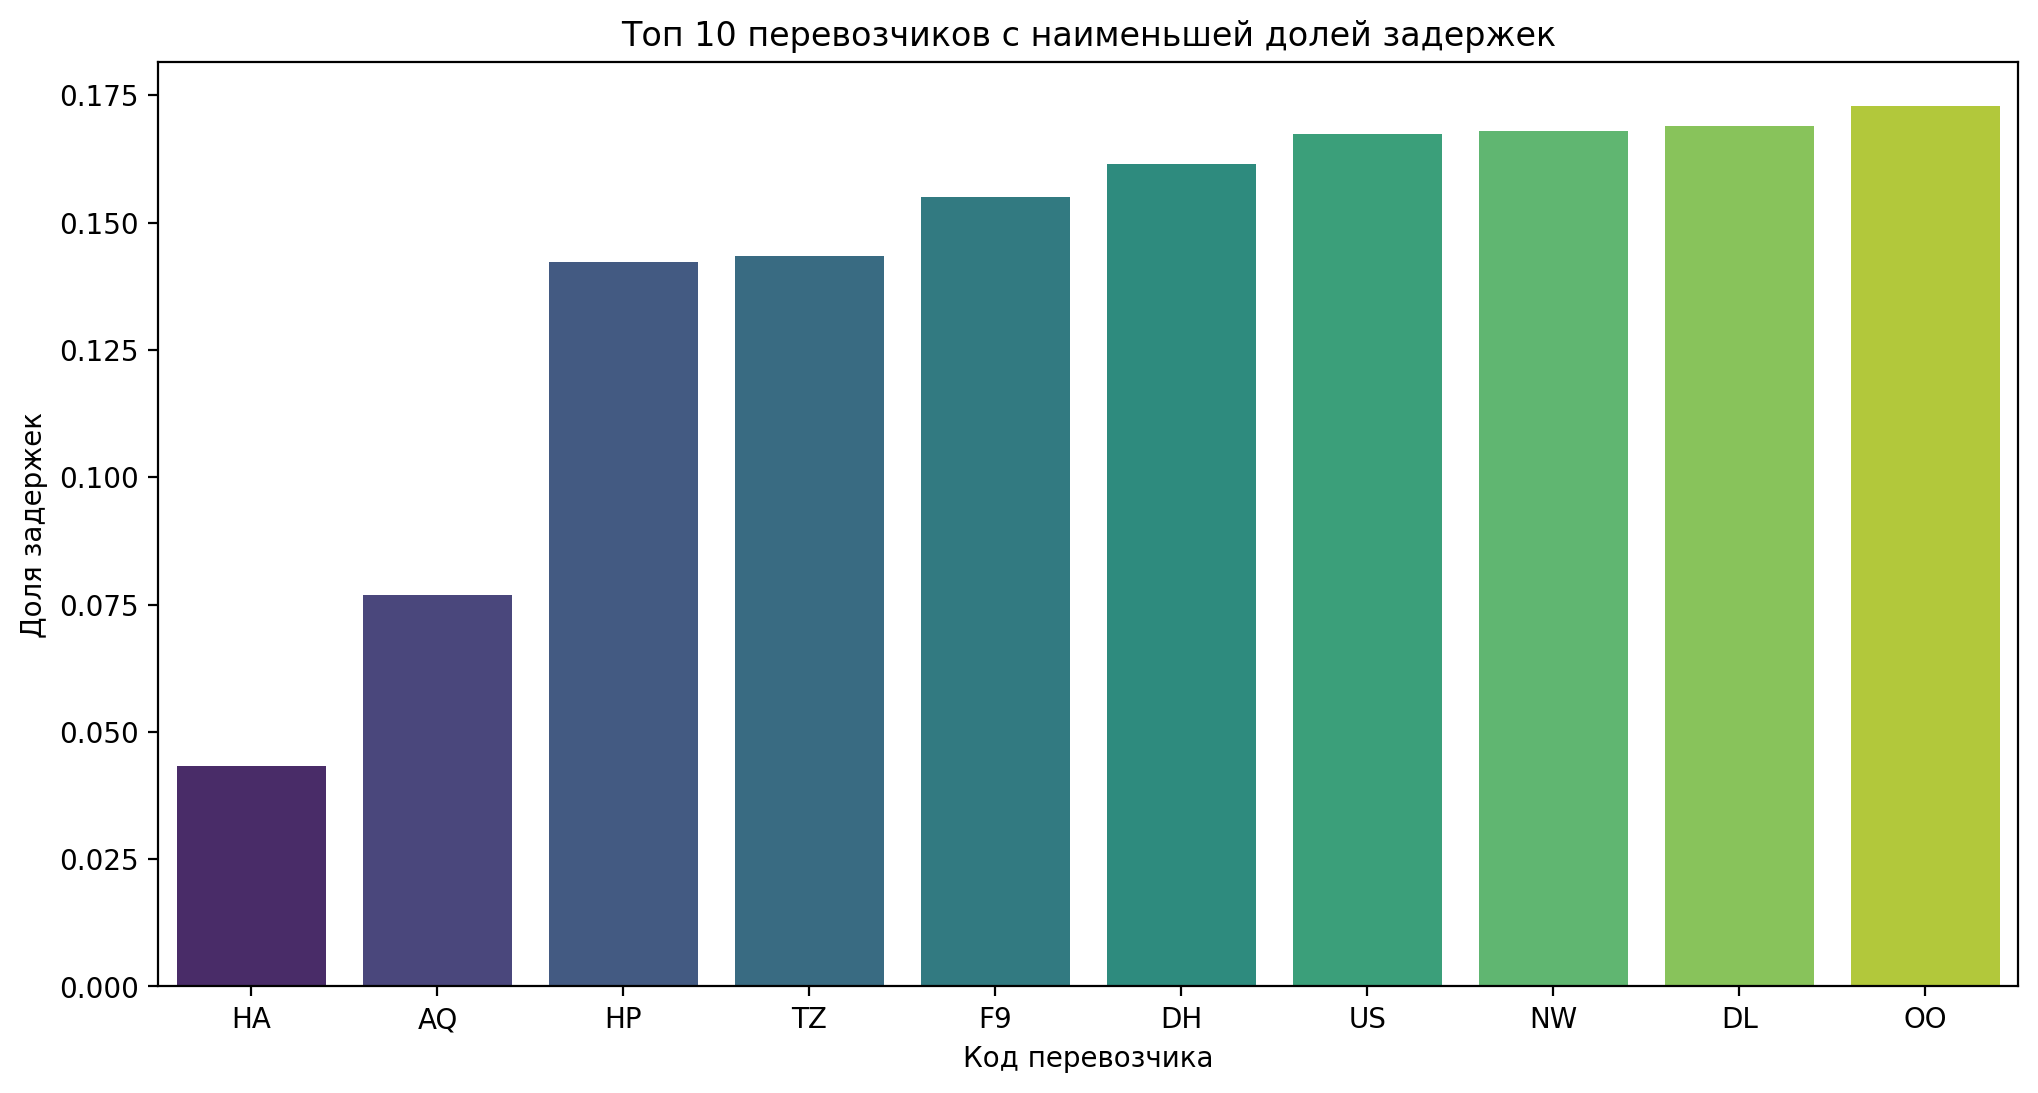

In [30]:
data = pd.read_csv('flight_delays.csv')

# Преобразование столбца 'dep_delayed_15min' в булев тип
data['dep_delayed_15min'] = data['dep_delayed_15min'].map({'Y': True, 'N': False})

# Расчет доли задержек для каждого перевозчика
top_10_carriers = data.groupby('UniqueCarrier')['dep_delayed_15min'].mean().sort_values().head(10)

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_carriers.index, y=top_10_carriers.values, palette='viridis')
plt.title('Топ 10 перевозчиков с наименьшей долей задержек')
plt.xlabel('Код перевозчика')
plt.ylabel('Доля задержек')
plt.show()

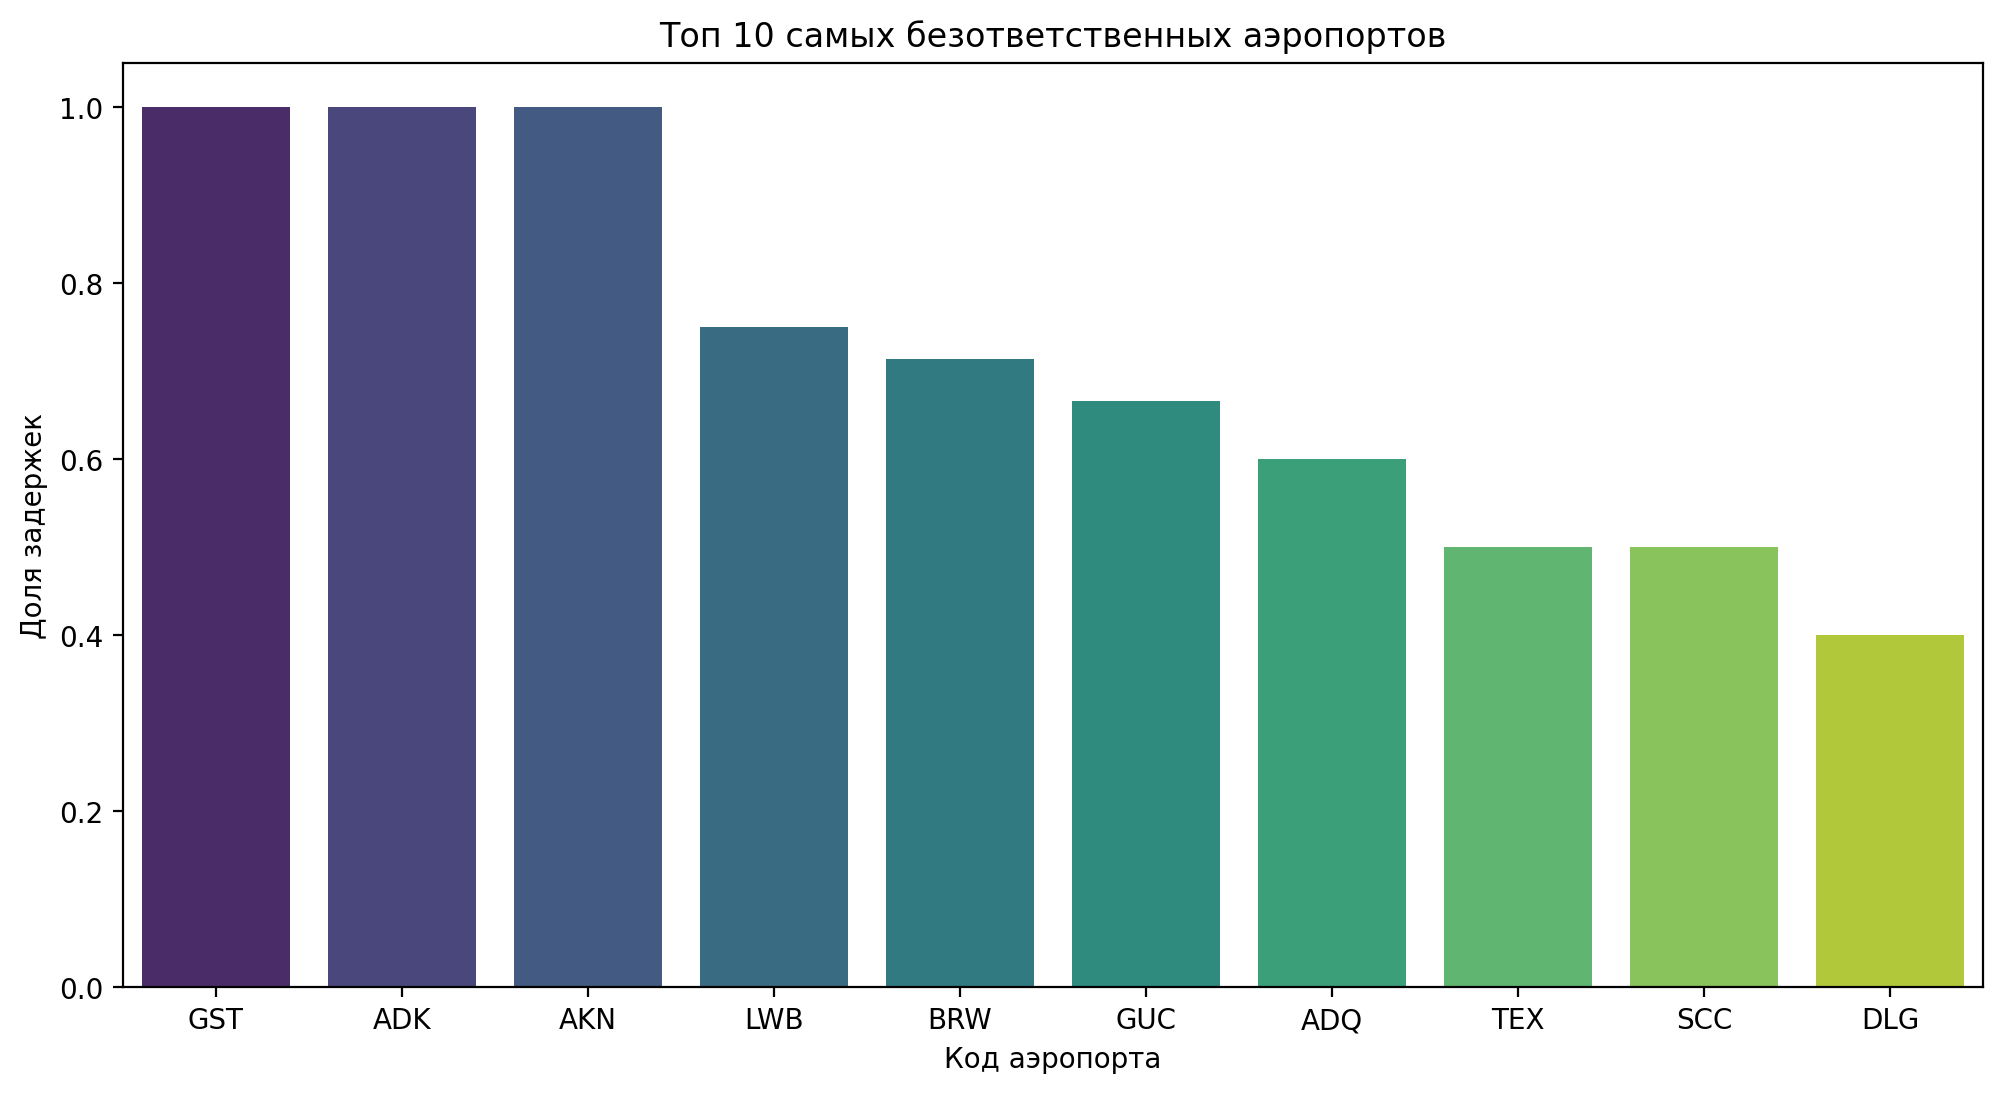

In [31]:
data = pd.read_csv('flight_delays.csv')

# Преобразование столбца 'dep_delayed_15min' в булев тип
data['dep_delayed_15min'] = data['dep_delayed_15min'].map({'Y': True, 'N': False})

# Расчет доли задержек для каждого аэропорта
antitop_10 = data.groupby('Origin')['dep_delayed_15min'].mean().sort_values(ascending=False).head(10)

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x=antitop_10.index, y=antitop_10.values, palette='viridis')
plt.title('Топ 10 самых безответственных аэропортов')
plt.xlabel('Код аэропорта')
plt.ylabel('Доля задержек')
plt.show()

## Очень полезные ссылки:

- https://habr.com/ru/post/468295/
- https://habr.com/ru/company/ods/blog/323210/